# Business Question
## As a software developer, should I work for a big company or a small one in the U.S. ? 

From the Stackflow survey data, I'd like to get answers to the following questions for me to make a conclusion:

* Do small and big companies offer similar WFH options? 
* Which type of companies pay better?
* Which type of companies offer better job and career satisfaction? 

In [105]:
##Import all necessary libraries


import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline


# Data Understanding 

Let's see what data we have in the data file

In [4]:
# read the data files
df = pd.read_csv('./survey_results_public.csv')
df2 = pd.read_csv('./survey_results_schema.csv')
df.head()


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Let's use bar charts to better understand the data

In [196]:
# filter out U.S. data since we are only interested in US respondents in this case

df_us = df[df.Country.eq("United States")]      
df_us.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,company
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,other
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,large
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN,small
10,11,Professional non-developer who sometimes write...,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,All or almost all the time (I'm full-time remote),100 to 499 employees,...,Female,"Some college/university study, no bachelor's d...",White or of European descent,Strongly disagree,Agree,Strongly disagree,Strongly agree,NaN,NaN,medium
15,16,Professional developer,"Yes, I program as a hobby",United States,"Yes, part-time","Independent contractor, freelancer, or self-em...",Primary/elementary school,NaN,All or almost all the time (I'm full-time remote),NaN,...,Male,A doctoral degree,White or of European descent,Disagree,Somewhat agree,Strongly disagree,Agree,NaN,NaN,other


In [5]:
# wrtie a function to quickly for us to create a bar chart for each column
def build_bar_chart(df, column, title):
    '''
    
    Displays a bar chart with a title
    
    Parameters:
    df: a dataframe
    column: the column which we want to show
    title: the title of the chart
    
    Returns:
    None
    
    '''
    status_vals = df[column].value_counts()
    (status_vals[:10]/df.shape[0]).plot(kind="bar");
    plt.title(title);

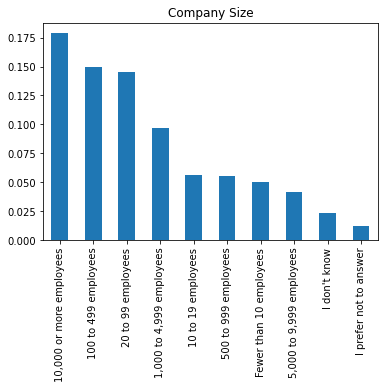

In [14]:
# Get a sense of the distribution of the reponses under Company Size 
build_bar_chart(df_us,"CompanySize","Company Size")

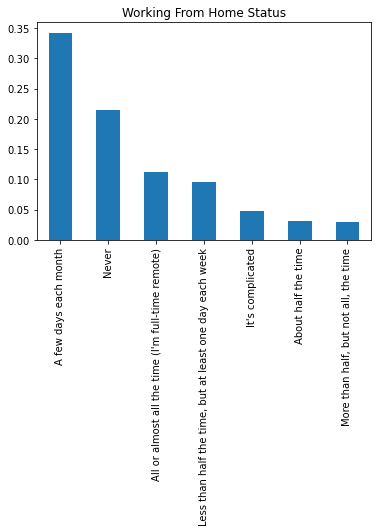

In [16]:
# The distrbution of the WFH question
build_bar_chart(df_us,"HomeRemote","Working From Home Status")

# Data Preparation

## 1. Handling Categorical Variables 

There are two categorical variables we need to recode: Company Size and WorkRemote.We need to regroup 5+ categories for each variable into a smaller set. Company Size : small, medium, large and others. WorkRemote: full-time remote, part-time remote, never and other.

In [195]:
def handling_company_size(df):
    '''
    
    Return a dataframe with company size categorized in to small, medium and large 
    
    Parameters:
    df: a raw data dataframe
    
    Returns:
    df: a dataframe with a new column small,medium, or other
    
    '''
    
    small = ['Fewer than 10 employees ','10 to 19 employees', '20 to 99 employees'] 
    medium = ['100 to 499 employees','500 to 999 employees']
    large = ['1,000 to 4,999 employees','5,000 to 9,999 employees','10,000 or more employees']

    
    #Add a new catagory seperating to western and eastern
    df['Company'] = df['CompanySize'].apply(lambda x: 'small' 
                                                  if x in small 
                                                  else ('medium' 
                                                        if x in medium
                                                          else ('large' 
                                                                if x in large
                                                                  else 'other')))
                                                    
    
    return df

In [33]:
handling_company_size(df_us)

C:\Users\gexi2\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,company
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,other
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,large
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Male,A doctoral degree,White or of European descent,Disagree,Agree,Disagree,Agree,NaN,NaN,small
10,11,Professional non-developer who sometimes write...,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,All or almost all the time (I'm full-time remote),100 to 499 employees,...,Female,"Some college/university study, no bachelor's d...",White or of European descent,Strongly disagree,Agree,Strongly disagree,Strongly agree,NaN,NaN,medium
15,16,Professional developer,"Yes, I program as a hobby",United States,"Yes, part-time","Independent contractor, freelancer, or self-em...",Primary/elementary school,NaN,All or almost all the time (I'm full-time remote),NaN,...,Male,A doctoral degree,White or of European descent,Disagree,Somewhat agree,Strongly disagree,Agree,NaN,NaN,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51380,51381,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Some college/university study without earning ...,Computer programming or Web development,"More than half, but not all, the time","10,000 or more employees",...,Male,High school,White or of European descent,Agree,Somewhat agree,Disagree,Somewhat agree,NaN,NaN,large
51381,51382,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,Psychology,"More than half, but not all, the time","10,000 or more employees",...,Male,A bachelor's degree,White or of European descent,Somewhat agree,Strongly agree,Strongly disagree,Strongly agree,NaN,NaN,large
51384,51385,Professional developer,No,United States,No,Employed full-time,Bachelor's degree,Computer programming or Web development,Never,20 to 99 employees,...,Male,A master's degree,White or of European descent,Somewhat agree,Agree,Disagree,Somewhat agree,NaN,NaN,small
51387,51388,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,A few days each month,100 to 499 employees,...,Male,A doctoral degree,East Asian; White or of European descent,Disagree,Agree,Strongly disagree,Strongly agree,58000.0,NaN,medium


In [35]:
# get a list of all categories
df.HomeRemote.value_counts()

A few days each month                                      15454
Never                                                      13975
All or almost all the time (I'm full-time remote)           4905
Less than half the time, but at least one day each week     4147
More than half, but not all, the time                       1909
It's complicated                                            1849
About half the time                                         1769
Name: HomeRemote, dtype: int64

In [69]:
def recode_WFH(df):
    '''
    
    Return a dataframe with WFH status categorized in to Never, Fulltime Remote and Parttime Remote
    Parameters:
    df: a raw data dataframe
    
    Returns:
    df: a dataframe with a new column small,medium, or other
    
    '''
    
    Never = ['Never']
    Fulltime_Remote = ["All or almost all the time (I'm full-time remote)"]
    Parttime_Remote = ['A few days each month',"Less than half the time, but at least one day each week",'More than half, but not all, the time',
                       "About half the time"]
    
    #Add a new catagory seperating to western and eastern
    df['WFH'] = df['HomeRemote'].apply(lambda x: 'never' 
                                                  if x in Never
                                                  else ('fulltime remote' 
                                                        if x in Fulltime_Remote
                                                          else ('parttime remote' 
                                                                if x in Parttime_Remote
                                                                  else 'other')))
                                                    
    
    return df

In [70]:
recode_WFH(df_us)
df_us.head()

C:\Users\gexi2\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,company,WFH Status,WFHStatus,WFH
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN,other,other,other,other
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN,large,parttime remote,parttime remote,parttime remote
6,7,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Master's degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...",20 to 99 employees,...,Disagree,Agree,Disagree,Agree,NaN,NaN,small,parttime remote,parttime remote,parttime remote
10,11,Professional non-developer who sometimes write...,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,A social science,All or almost all the time (I'm full-time remote),100 to 499 employees,...,Strongly disagree,Agree,Strongly disagree,Strongly agree,NaN,NaN,medium,fulltime remote,fulltime remote,fulltime remote
15,16,Professional developer,"Yes, I program as a hobby",United States,"Yes, part-time","Independent contractor, freelancer, or self-em...",Primary/elementary school,NaN,All or almost all the time (I'm full-time remote),NaN,...,Disagree,Somewhat agree,Strongly disagree,Agree,NaN,NaN,other,fulltime remote,fulltime remote,fulltime remote


## 2. Further Data Cleaning and Preparation
Since we are only going to analyze a subset of the dataframe: df_us, we can further filter out the data we use for cleaner analysis.
Note: here I also set a filter on Professional and EmploymentStatus because I'm only exmining the responses of full time professional developers.

In [186]:
def data_preparation(df):
    '''
    
    Return useful columns with query condition
    
    Parameters:
    df: a raw data dataframe
    
    Returns:
    useful_df: a filtered dataframe with only useful columns
    
    '''
    #Get some useful columns for analysis
    useful_columns = ['CareerSatisfaction', 'JobSatisfaction','company', 'Salary',"WFH"]
    useful_df = pd.DataFrame(df.query("Professional == 'Professional developer'and EmploymentStatus == 'Employed full-time'"))[useful_columns]
    return useful_df

In [192]:
cleaned_df_us = data_preparation (df_us)
cleaned_df_us.head()



,CareerSatisfaction,JobSatisfaction,company,Salary,WFH
17,9.0,8.0,large,130000.0,fulltime remote
18,5.0,3.0,large,82500.0,parttime remote
25,7.0,7.0,large,175000.0,parttime remote
27,9.0,9.0,medium,NaN,parttime remote
39,9.0,8.0,other,NaN,parttime remote


## 3. Missing Data and NAs 

As the subset of data shows above, we have missing data at least in Salary. To compare total counts of the dataset and the counts of each continious variables, we can see that we have missing data in all three continous variables we study. However, since I'm going to use GROUPBY function, which will automatically leaves out missing data, we don't have to take missing data points out.


In [193]:
cleaned_df_us.shape[0]

7416

In [194]:
cleaned_df_us.describe()

,CareerSatisfaction,JobSatisfaction,Salary
count,7336.000000,7326.000000,3722.000000
mean,7.806843,7.219902,97027.738851
std,1.641374,2.117334,34300.242451
min,0.000000,0.000000,5.000000
25%,7.000000,6.000000,71000.000000
50%,8.000000,8.000000,95000.000000
75%,9.000000,9.000000,120000.000000
max,10.000000,10.000000,197000.000000


# Data Analysis (Modeling) and Evaluation

We are going to use descriptive analysis here to get insights from the data:

1. Crosstabulation between WFH and Company Size 
2. Caculating average salary by Company Size
3. Caculating average ratings on job satisfaction and career satisfaction by company size


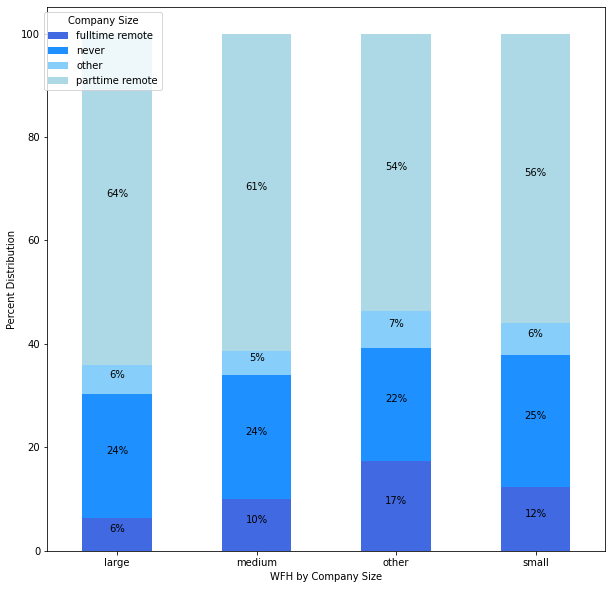

In [151]:
 # crosstab analysis: WFH vs Company Size
    
pal = ["royalblue", "dodgerblue", "lightskyblue", "lightblue","Yellow"]
ax= pd.crosstab(cleaned_df_us.company, [cleaned_df_us.WFH], rownames=['company'], colnames=['WFH'], normalize='index').round(3)*100 

ax_1 = ax.plot.bar(figsize=(10,10),stacked=True, rot=0, color = pal)

#display(ax)

plt.legend(loc='upper center', bbox_to_anchor=(0.1, 1.0), title="Company Size")

plt.xlabel('WFH by Company Size')
plt.ylabel('Percent Distribution')

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2, 
              rec.get_y() + height / 2,
              "{:.0f}%".format(height),
              ha='center', 
              va='bottom')

plt.show()

The bar chart above shows the % of WFH status by the company size respondents work at. The vast majority of professional programmers are able to at least partically work from home regardless the company size. People working for smaller companies tend to have a higher change being full-time remote employees.

In [182]:
# in the following we are going to caculate the average of a continious variable by company size. Remeber groupby will 
# automatically skip missing data 

comparison = cleaned_df_us.groupby(['company']).mean()

cleaned_df_us['company'].unique()

array(['large', 'medium', 'other', 'small'], dtype=object)

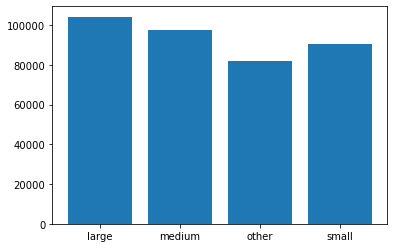

In [183]:
# Average Salary by Company Size 

comparison.groupby('company').mean().Salary.round(0)

x = cleaned_df_us['company'].unique()
y = comparison.Salary

plt.bar(x,y)
plt.show()

In this bar chart we can see that Salary positively correlates with company size. Programmers working for larger companies tend to earn more than working for smaller companies.

company
large     104217.0
medium     97647.0
other      81968.0
small      90317.0
Name: Salary, dtype: float64

Text(0, 0.5, 'Job Satisfaction')

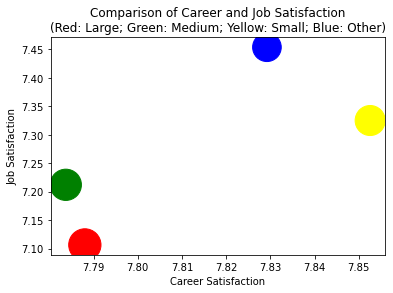

In [158]:
#Plot Comparison of Career and Job Satisfaction by company size 
display(comparison.groupby('company').mean().Salary.round(0))

plt.scatter(comparison.groupby('company').mean().CareerSatisfaction, comparison.groupby('company').mean().JobSatisfaction, comparison.groupby('company').mean().Salary/100,  c=['red','green','blue','yellow'])

plt.title('Comparison of Career and Job Satisfaction\n(Red: Large; Green: Medium; Yellow: Small; Blue: Other)')
plt.xlabel('Career Satisfaction')
plt.ylabel('Job Satisfaction')

Here we plot Job Satisfaction and Career Satisfaction into one scatterplot for easier comparison. The size of the bubbles represents Average Salary. Here we can see that our respondents working for Medium sized companies enjoy their workplace the most in terms of Job Satisfaction and Career Satisfaction.

## Conclusion

 * Most of companies offer some level of WFH time regardless company size
 
 * Average salary does correlates with company size with large companies paying the highest.
 
 * Software developers working for medium size companies have the highest job and career satisfaction

# Results 
To read the full write up of the results please check here: https://xiangmengge.medium.com/write-a-data-science-blog-post-db0da8dbe5e9

Cheers!